# Random Variables and Distributions: Poisson

Name: Arthur Pontes Nader

The Poisson distribution is used in situations where you are counting the number of events that occur within a fixed interval of time or space

## Libraries

In [53]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

Let's delve into the Poisson distribution. Observe the following formula:

$$ P(Y = k) = \frac{\lambda^k}{k!} e^{-\lambda} $$

This distribution only has one parameter, named lambda, and we will observe how it can change considerably the probability mass function.

In [54]:
def poisson(k, lambda_):
   
    return stats.poisson.pmf(k, lambda_), stats.poisson.cdf(k, lambda_)

In [55]:
k = np.arange(0, 25)
lambda_1 = 0.73
lambda_2 = 10

pmfs_073, cdfs_073 = poisson(k, lambda_1)
pmfs_10, cdfs_10 = poisson(k, lambda_2)

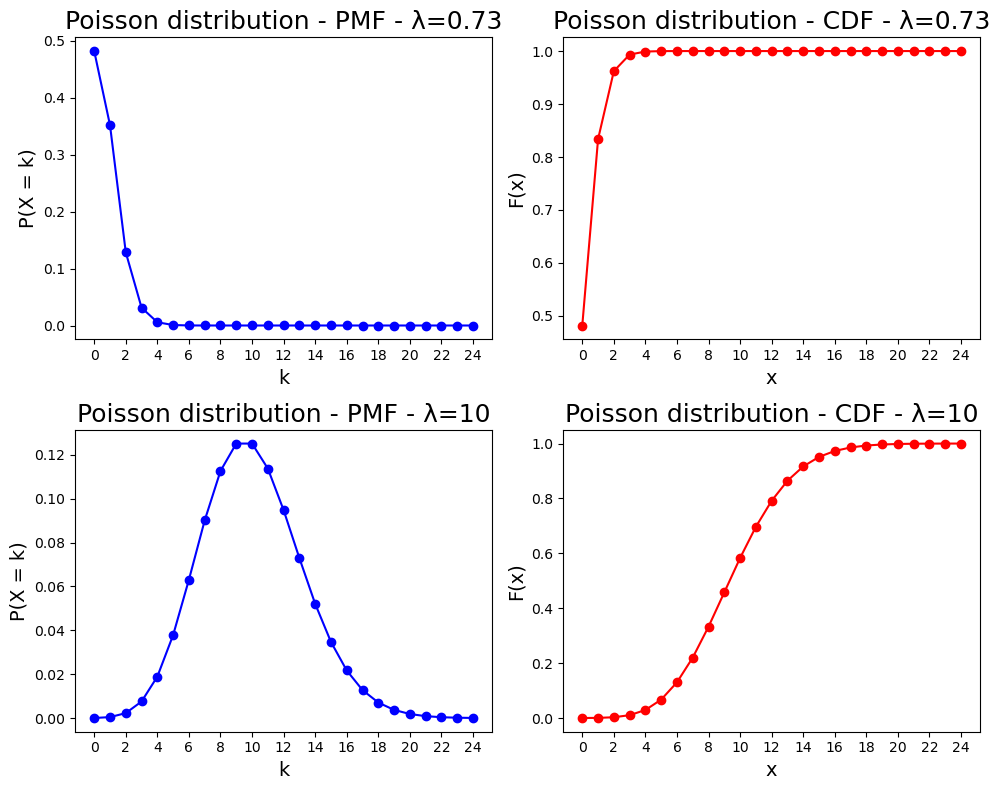

In [56]:
fig, axs = plt.subplots(2, 2, figsize = (10,8))

axs[0, 0].plot(k, pmfs_073, 'bo-', label='λ=0.73')
axs[0, 0].set_xlabel('k', fontsize = 14)
axs[0, 0].set_ylabel('P(X = k)', fontsize = 14)
axs[0, 0].set_title('Poisson distribution - PMF - λ=0.73', fontsize = 18)
axs[0, 0].set_xticks(np.arange(0, 26, 2))

axs[0, 1].plot(k, cdfs_073, 'ro-', label='λ=0.73')
axs[0, 1].set_xlabel('x', fontsize = 14)
axs[0, 1].set_ylabel('F(x)', fontsize = 14)
axs[0, 1].set_title('Poisson distribution - CDF - λ=0.73', fontsize = 18)
axs[0, 1].set_xticks(np.arange(0, 26, 2))

axs[1, 0].plot(k, pmfs_10, 'bo-', label='λ=10')
axs[1, 0].set_xlabel('k', fontsize = 14)
axs[1, 0].set_ylabel('P(X = k)', fontsize = 14)
axs[1, 0].set_title('Poisson distribution - PMF - λ=10', fontsize = 18)
axs[1, 0].set_xticks(np.arange(0, 26, 2))

axs[1, 1].plot(k, cdfs_10, 'ro-', label='λ=10')
axs[1, 1].set_xlabel('x', fontsize = 14)
axs[1, 1].set_ylabel('F(x)', fontsize = 14)
axs[1, 1].set_title('Poisson distribution - CDF - λ=10', fontsize = 18)
axs[1, 1].set_xticks(np.arange(0, 26, 2))

fig.tight_layout()
plt.show()

The expected value of the Poisson is the lambda itself

In [57]:
np.dot(k, pmfs_073), np.dot(k, pmfs_10)

(0.7300000000000001, 9.998798778460523)

The range of values (a, b) which the propability of X ∈ (a, b) is near 1 seems to be a = 0 and b = 4 for lambda = 0.73

In [58]:
print(cdfs_073[3])

0.993352334865238


Also, for lambda = 10, it looks like a = 2 and b = 19

In [59]:
print(cdfs_10[18] - cdfs_10[1])

0.9923140961687583


Now, let's generate 200 random values from the two distributions:

In [60]:
random_values_073 = stats.poisson.rvs(lambda_1, size=200)
random_values_10 = stats.poisson.rvs(lambda_2, size=200)

Let's compare the pmf values with the sample frequency:

In [61]:
print("For lambda = 0.73")
for i in range(6):
    print(f"P(X = {i}): ", round(pmfs_073 [i],3))
    
    mask = (random_values_073 == i)
    count = np.count_nonzero(mask)
    print(f"Percentage of {i} in the sample: ", count/200, "\n")

For lambda = 0.73
P(X = 0):  0.482
Percentage of 0 in the sample:  0.46 

P(X = 1):  0.352
Percentage of 1 in the sample:  0.345 

P(X = 2):  0.128
Percentage of 2 in the sample:  0.15 

P(X = 3):  0.031
Percentage of 3 in the sample:  0.035 

P(X = 4):  0.006
Percentage of 4 in the sample:  0.01 

P(X = 5):  0.001
Percentage of 5 in the sample:  0.0 



In [62]:
print("For lambda = 10")
for i in range(4, 12):
    print(f"P(X = {i}): ", round(pmfs_10 [i],3))
    
    mask = (random_values_10 == i)
    count = np.count_nonzero(mask)
    print(f"Percentage of {i} in the sample: ", count/200, "\n")

For lambda = 10
P(X = 4):  0.019
Percentage of 4 in the sample:  0.025 

P(X = 5):  0.038
Percentage of 5 in the sample:  0.04 

P(X = 6):  0.063
Percentage of 6 in the sample:  0.045 

P(X = 7):  0.09
Percentage of 7 in the sample:  0.065 

P(X = 8):  0.113
Percentage of 8 in the sample:  0.15 

P(X = 9):  0.125
Percentage of 9 in the sample:  0.155 

P(X = 10):  0.125
Percentage of 10 in the sample:  0.155 

P(X = 11):  0.114
Percentage of 11 in the sample:  0.135 



## Market customers

Marco has a small market in the neighborhood. And don't ask how, but he knows that the number of customers per hour is given by a Poisson distribution with lambda = 12. So, on a normal day, he works there 10 hours and therefore expects to receive 120 customers.

In [110]:
k = np.arange(0, 25)
lambda_ = 12

In [111]:
pmfs_12, _ = poisson(k, lambda_)

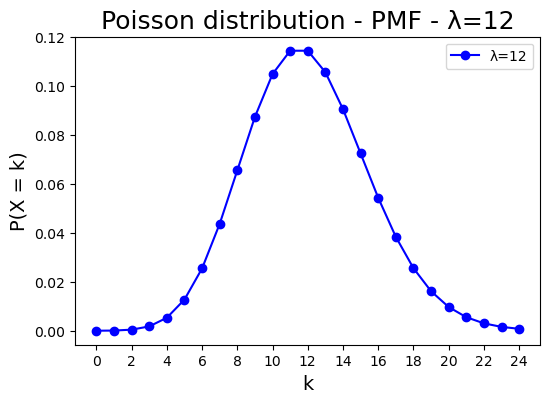

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(k, pmfs_12, 'bo-', label='λ=12')
ax.set_xlabel('k', fontsize=14)
ax.set_ylabel('P(X = k)', fontsize=14)
ax.set_title('Poisson distribution - PMF - λ=12', fontsize=18)
ax.set_xticks(np.arange(0, 26, 2))
ax.legend()

plt.show()

He opened the market at 8 am and observe the amount of customers per hour until lunch time:

8:00 - 9:00 -> 2\
9:00 - 10:00 -> 3\
10:00 - 11:00 -> 6\
11:00 - 12:00 -> 4

He is worried because sales are too low for a normal day. He comes home for lunch and tries to figure out the probability of this observation coming from the usual distribution he obtained during more than a year of data collection.

In [113]:
observed_customers = [2, 3, 6, 4]

probability_observed = stats.poisson.pmf(observed_customers, lambda_)
probability_observed

array([0.00044238, 0.00176953, 0.02548128, 0.0053086 ])

In [114]:
joint_probability = np.prod(probability_observed)
joint_probability

1.0589088430804028e-10

Marco is sad. As he prepares to return to the store, his wife says, "Darling, today is a holiday. You don't have to work after lunch."

Marco thought with relief: “It's good that lambda is 4 on holidays”.

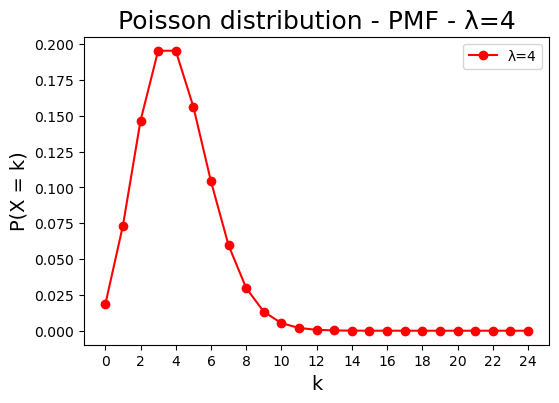

In [115]:
lambda_holiday = 4
pmfs_holiday, _ = poisson(k, lambda_holiday)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(k, pmfs_holiday, 'ro-', label='λ=4')
ax.set_xlabel('k', fontsize=14)
ax.set_ylabel('P(X = k)', fontsize=14)
ax.set_title('Poisson distribution - PMF - λ=4', fontsize=18)
ax.set_xticks(np.arange(0, 26, 2))
ax.legend()
plt.show()

In [116]:
probability_observed_holiday = stats.poisson.pmf(observed_customers, lambda_holiday)
probability_observed_holiday

array([0.14652511, 0.19536681, 0.10419563, 0.19536681])

In [117]:
joint_probability_holiday = np.prod(probability_observed_holiday)
joint_probability_holiday

0.0005827243623033169